# <div style="text-align: center">Gmail Classification Models</div>

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import nltk

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Minh
[nltk_data]     Thai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Read Excel file**

In [4]:
df = pd.read_excel(r'D:\dataset\All_Emails.xlsx')

df.drop('Unnamed: 0', axis=1, inplace = True)
df.columns = ['Label', 'Text', 'Label_Number']
df.head()

,Label,Text,Label_Number
0,spam,Why United Kingdom is best study destination_x...,1
1,non_spam,Homeowners are looking for a tenant like you z...,0
2,non_spam,Shop Assigned Mi Home VM JanakpuriHigh Street...,0
3,non_spam,Profile picture pending approval_x000D_\nHi Ru...,0
4,non_spam,Mahimagoyal JEE Main New Exam Dates Out_x000D_\n,0


In [5]:
df.shape

(980, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         980 non-null    object
 1   Text          980 non-null    object
 2   Label_Number  980 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.1+ KB


In [7]:
df.isna().sum()

Label           0
Text            0
Label_Number    0
dtype: int64

In [8]:
df['Label_Number'].value_counts()

0    938
1     42
Name: Label_Number, dtype: int64

**Count Plot**

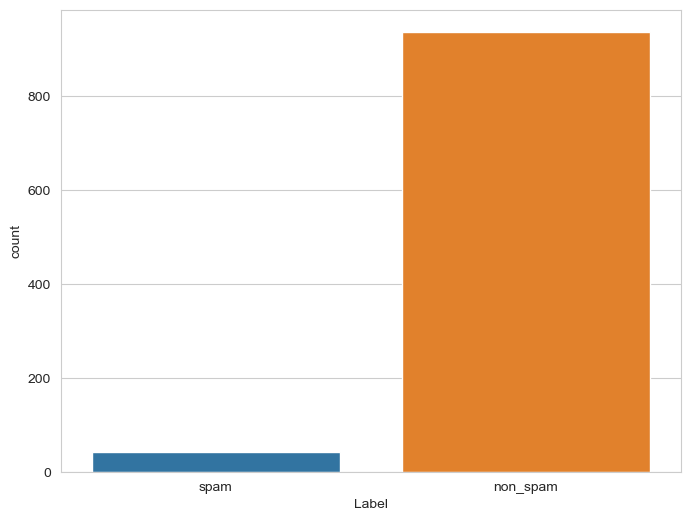

In [9]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'Label');

**Count no. of each word**

In [10]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)
df['count']=df['Text'].apply(count_words)
df['count']

0      713
1      114
2      687
3      107
4        7
      ... 
975     27
976     28
977    277
978     15
979      3
Name: count, Length: 980, dtype: int64

In [11]:
df.groupby('Label_Number')['count'].mean()

Label_Number
0    199.382729
1    423.642857
Name: count, dtype: float64

**Tokenization**

In [12]:
%%time
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

print('Before cleaning:')
df.head()

Before cleaning:
CPU times: total: 0 ns
Wall time: 0 ns


,Label,Text,Label_Number,count
0,spam,Why United Kingdom is best study destination_x...,1,713
1,non_spam,Homeowners are looking for a tenant like you z...,0,114
2,non_spam,Shop Assigned Mi Home VM JanakpuriHigh Street...,0,687
3,non_spam,Profile picture pending approval_x000D_\nHi Ru...,0,107
4,non_spam,Mahimagoyal JEE Main New Exam Dates Out_x000D_\n,0,7


In [13]:
print('After cleaning:')
df['Text'] = df['Text'].apply(lambda string: clean_str(string))
df.head()

After cleaning:


,Label,Text,Label_Number,count
0,spam,why united kingdom is best study destination x...,1,713
1,non_spam,homeowners are looking for a tenant like you z...,0,114
2,non_spam,shop assigned mi home vm janakpurihigh street ...,0,687
3,non_spam,profile picture pending approval x d hi rupal ...,0,107
4,non_spam,mahimagoyal jee main new exam dates out x d,0,7


**Stemming words**

In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])
df['Text']=df['Text'].apply(stemming)
df.head()

,Label,Text,Label_Number,count
0,spam,why united kingdom is best study destination x...,1,713
1,non_spam,homeowners are looking for a tenant like you z...,0,114
2,non_spam,shop assigned mi home vm janakpurihigh street ...,0,687
3,non_spam,profile picture pending approval x d hi rupal ...,0,107
4,non_spam,mahimagoyal jee main new exam dates out x d,0,7


In [15]:
X = df.loc[:, 'Text']
y = df.loc[:, 'Label_Number']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (980,)
shape of y: (980,)


**Split into Training data and Test data**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [34]:
X_test

25     utfqmahimagoyalrememberyour utfqaccountesready...
582    mahimagoyal srmjeee application deadline is ap...
559    enjoy tasty free burgers with this gift card x...
870    vicharmic answer this short profile survey now...
786    utfbunmumjawicatiockqockjydgpljgplgpligksvkwai...
                             ...                        
726    utfbkskscksmkwhks x d mahima tech chowk team c...
780    upcoming changes to our paypal legal agreement...
96     attend siecs virtual australian education fair...
548    mahima goyal pay with paypal at alternative ai...
351    reminder samoh peh nayii activity aapki honest...
Name: Text, Length: 196, dtype: object

In [17]:
print(f"Training Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Training Data Shape: (784,)
Test Data Shape: (196,)


**Count Vectorization to Extract Features from Text**

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv.fit(X_train)

CountVectorizer()

In [19]:
print('No.of Tokens: ',len(cv.vocabulary_.keys()))

No.of Tokens:  9246


In [20]:
dtv = cv.transform(X_train)
dtv_test = cv.transform(X_test)
type(dtv)

scipy.sparse._csr.csr_matrix

In [21]:
dtv = dtv.toarray()
dtv_test = dtv_test.toarray()

In [22]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 784
Tokens/Features: 9246


In [23]:
dtv[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
dtv_test[0:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Random Forest

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Huấn luyện mô hình trên tập train
rdf_clf = Random ForestClassifier(
#     n_estimators=400,
#     criterion='gini',
#     max_depth = 4,
#     max_leaf_nodes = 16,
#     min_samples_split = 10,
#     min_samples_leaf = 10
)

rdf_clf.fit(dtv, y_train)

# Dự báo trên tập test
y_pred = rdf_clf.predict(dtv_test)
scores = accuracy_score(y_pred, y_test)
print('RandomForest Accuracy: {:.03f}'.format(scores))

RandomForest Accuracy: 0.964


In [38]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [37]:
y_test

25     0
582    0
559    0
870    0
786    0
      ..
726    0
780    0
96     0
548    0
351    0
Name: Label_Number, Length: 196, dtype: int64

In [36]:
X_test

25     utfqmahimagoyalrememberyour utfqaccountesready...
582    mahimagoyal srmjeee application deadline is ap...
559    enjoy tasty free burgers with this gift card x...
870    vicharmic answer this short profile survey now...
786    utfbunmumjawicatiockqockjydgpljgplgpligksvkwai...
                             ...                        
726    utfbkskscksmkwhks x d mahima tech chowk team c...
780    upcoming changes to our paypal legal agreement...
96     attend siecs virtual australian education fair...
548    mahima goyal pay with paypal at alternative ai...
351    reminder samoh peh nayii activity aapki honest...
Name: Text, Length: 196, dtype: object

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.73      0.67      0.70        12

    accuracy                           0.96       196
   macro avg       0.85      0.83      0.84       196
weighted avg       0.96      0.96      0.96       196



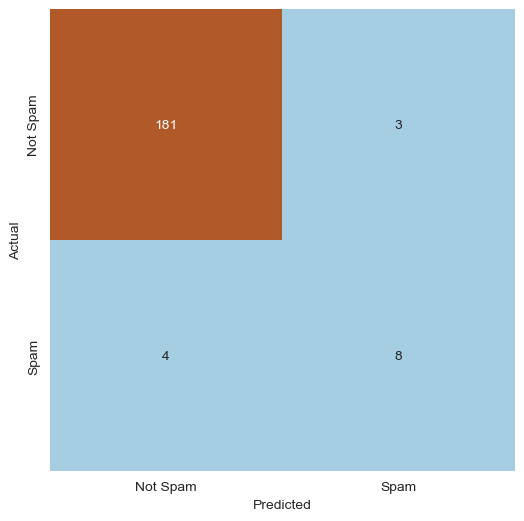

In [125]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

**Apply different models**

In [144]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(dtv, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 1.09 sec
MultinomialNB        trained in 0.07 sec
Logistic Regr.       trained in 0.1 sec
KNN                  trained in 0.0 sec
Decision Tree        trained in 1.17 sec
SVM (Linear)         trained in 0.1 sec
SVM (RBF)            trained in 0.93 sec
CPU times: total: 6.52 s
Wall time: 3.47 s


In [145]:
test_dtv = cv.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens: {test_dtv.shape[1]}")

Number of Observations: 196
Tokens: 9246


**Test Accuracy and Training Time**

In [146]:
models_accuracy = []
for name, model in models.items():
    models_accuracy.append([name, model["model"].score(test_dtv, y_test),model["perf"]])

In [147]:
df_accuracy = pd.DataFrame(models_accuracy)
df_accuracy.columns = ['Model', 'Test Accuracy', 'Training time (sec)']
df_accuracy.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
df_accuracy.reset_index(drop = True, inplace=True)
df_accuracy

,Model,Test Accuracy,Training time (sec)
0,SVM (RBF),0.974490,0.93
1,Logistic Regr.,0.969388,0.10
2,Random Forest,0.964286,1.09
3,KNN,0.964286,0.00
4,Decision Tree,0.964286,1.17
5,SVM (Linear),0.964286,0.10
6,MultinomialNB,0.959184,0.07


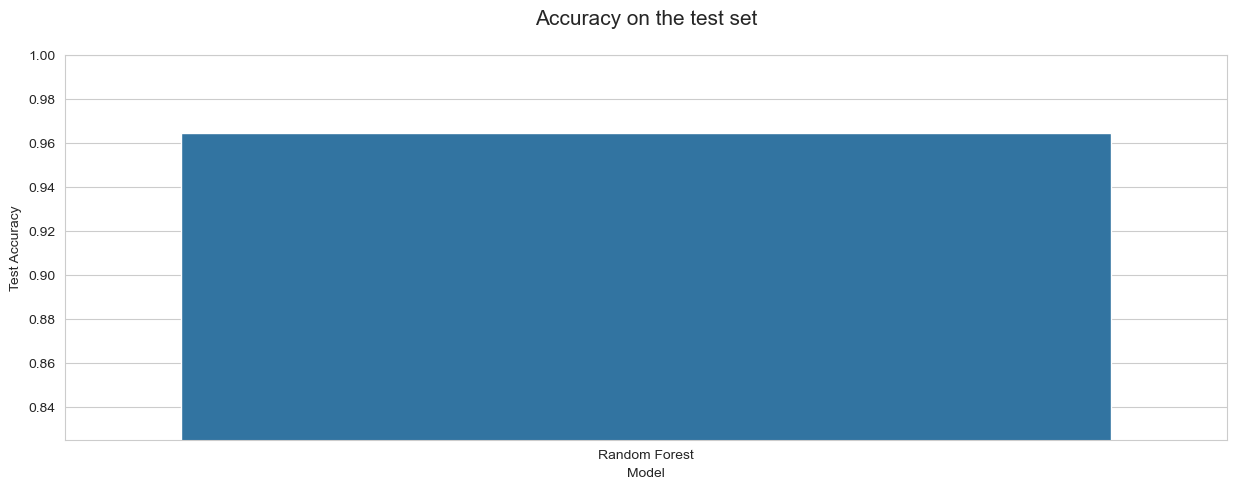

In [142]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = df_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.825,1)
plt.show()

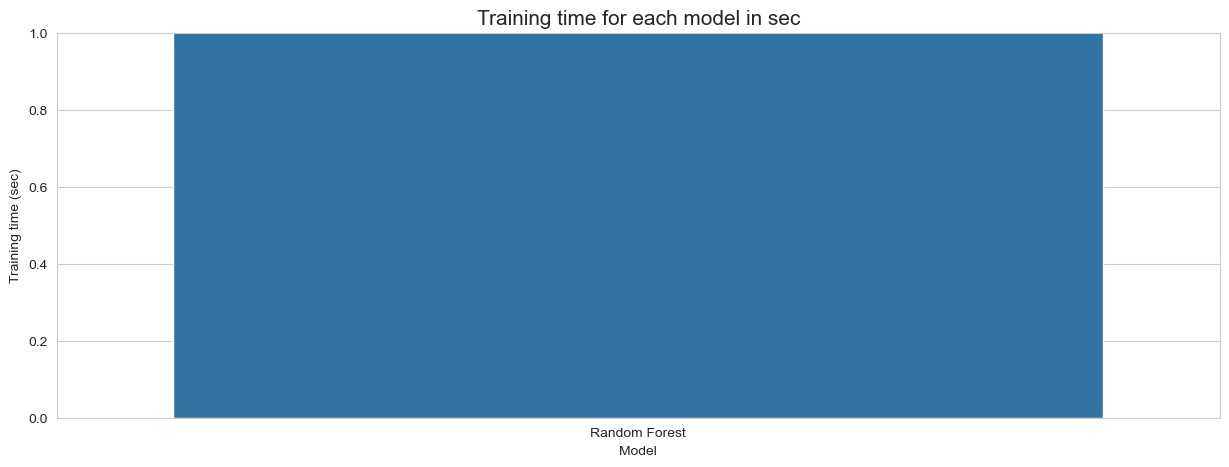

In [143]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_accuracy)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,1)
plt.show()

## **Logistic Regression**<br>

In [28]:
%%time
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)
pred = lr.predict(test_dtv)

Wall time: 85.8 ms


In [29]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.93877551020408


**Classification Report**

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.75      0.75      0.75        12

    accuracy                           0.97       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.97      0.97      0.97       196



**Confusion Matrix**

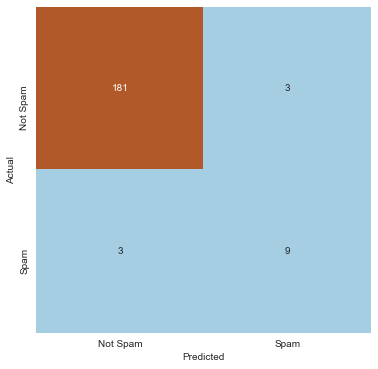

In [31]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Support Vector Machine (RBF)**<br>

In [32]:
%%time
svc = SVC()
svc.fit(dtv, y_train)
pred = svc.predict(test_dtv)

Wall time: 811 ms


In [33]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  97.44897959183673


**Classification Report**

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       184
           1       1.00      0.58      0.74        12

    accuracy                           0.97       196
   macro avg       0.99      0.79      0.86       196
weighted avg       0.98      0.97      0.97       196



**Confusion Matrix**

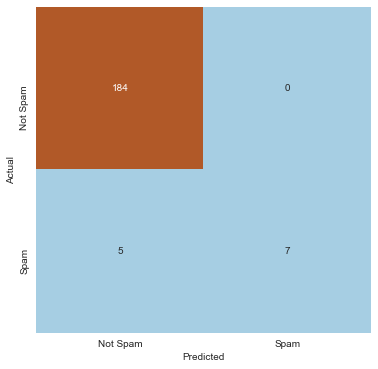

In [35]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Random Forest Classifier**<br>

In [36]:
%%time
rfc = RandomForestClassifier()
rfc.fit(dtv, y_train)
pred = rfc.predict(test_dtv)

Wall time: 793 ms


In [37]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


**Classification Report**

In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.69      0.75      0.72        12

    accuracy                           0.96       196
   macro avg       0.84      0.86      0.85       196
weighted avg       0.97      0.96      0.96       196



**Confusion Matrix**

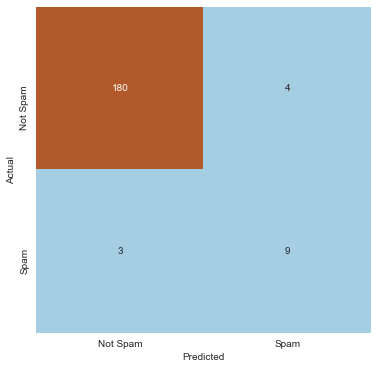

In [39]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Multinomial Naive Bayes** <br>

In [40]:
%%time
mnb = MultinomialNB()
mnb.fit(dtv, y_train)
pred = mnb.predict(test_dtv)

Wall time: 54.9 ms


In [41]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.91836734693877


**Classification Report**

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.67      0.67      0.67        12

    accuracy                           0.96       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.96      0.96      0.96       196



**Confusion Matrix**

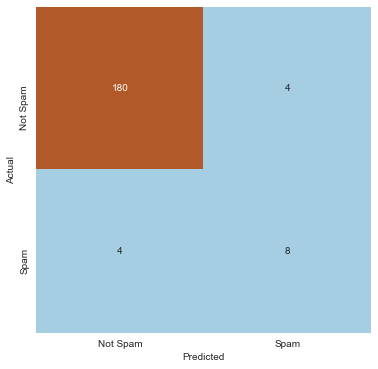

In [43]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Support Vector Machine (Linear)** <br>

In [44]:
%%time
lsvc = LinearSVC()
lsvc.fit(dtv, y_train)
pred = lsvc.predict(test_dtv)

Wall time: 86.8 ms


In [45]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


**Classification Report**

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.69      0.75      0.72        12

    accuracy                           0.96       196
   macro avg       0.84      0.86      0.85       196
weighted avg       0.97      0.96      0.96       196



**Confusion Matrix**

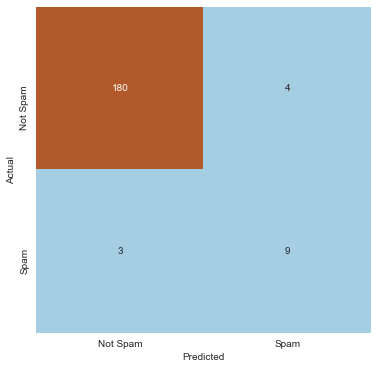

In [47]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Decision Tree Classifier** <br>

In [76]:
%%time
dtc = DecisionTreeClassifier()
dtc.fit(dtv, y_train)
pred = dtc.predict(test_dtv)

Wall time: 912 ms


In [77]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.91836734693877


**Classification Report**

In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       184
           1       0.64      0.75      0.69        12

    accuracy                           0.96       196
   macro avg       0.81      0.86      0.84       196
weighted avg       0.96      0.96      0.96       196



**Confusion Matrix**

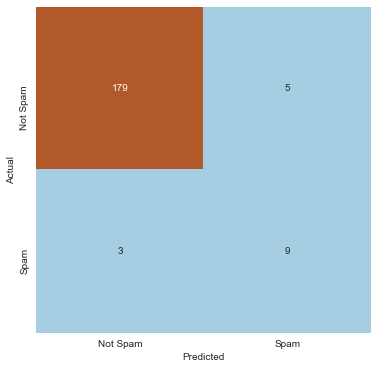

In [79]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **K Nearest Neighbours**<br>

In [52]:
%%time
knn = KNeighborsClassifier()
knn.fit(dtv, y_train)
pred = knn.predict(test_dtv)

Wall time: 74.8 ms


In [53]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


**Classification Report**

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.73      0.67      0.70        12

    accuracy                           0.96       196
   macro avg       0.85      0.83      0.84       196
weighted avg       0.96      0.96      0.96       196



**Confusion Matrix**

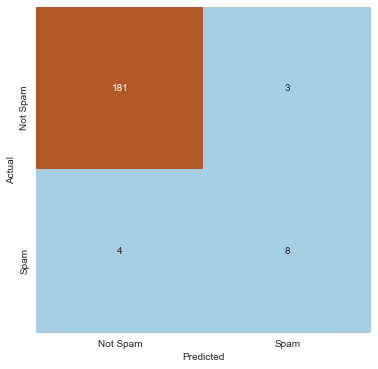

In [55]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);